## Softmax

In [1]:
import numpy as np

In [2]:
vector = np.array([11231, 999, 123142])

In [3]:
vector = np.array([-10, 10, 24])

In [4]:
def softmax(vec):
    vec -= np.max(vec)
    exp = np.exp(vec)
    return exp / np.sum(exp)

In [5]:
softmax(vector)

array([1.71390701e-15, 8.31528028e-07, 9.99999168e-01])

## Assignment-04 基于维基百科的词向量构建

在本章，你将使用Gensim和维基百科获得你的第一批词向量，并且感受词向量的基本过程。

![](https://www.kaggleusercontent.com/kf/1018109/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..JNNggcCCDcYEypvp7ZDwOA.cM9CuDpuCKo0K_ZkMFLAUvhfip0P6SRZ4LddwgTtgwz8pQy1dZeGVJWi6u81KSpAFNSi7YximVVJbPw8xsFySdWlqoUwvSER-LLIRfmlpsCvtDt90NaLYT2FHlwl0tfF-1MKtiFsWlGQ8LGo40hL3ccBSwMZy214kGJf9bNkW_g.kZbF5sgN5qha3zhjilfSDg/__results___files/__results___9_0.png)

## Step-01: Download Wikipedia Chinese Corpus: https://dumps.wikimedia.org/zhwiki/20190720/



Ans: 
According to https://github.com/attardi/wikiextractor/wiki#Usage, 
I use  http://dumps.wikimedia.org/XXwiki/latest/XXwiki-latest-pages-articles.xml.bz2, 
where XX is the language identifier (e.g. en, es, zh), 
that is http://dumps.wikimedia.org/enwiki/latest/enwiki-latest-pages-articles.xml.bz2

第一步：使用维基百科下载中文语料库

## Step-02: Using https://github.com/attardi/wikiextractor to extract the wikipedia corpus

第二步：使用python wikipedia extractor抽取维基百科的内容

ans:
use pycharm terminal, code is :
'C:\hyapp\Anaconda_3_5_0_1\python.exe
C:\users\localadmin_yinyin\appdata\roaming\python\python35\site-packages\wikiextractor\wikiextractor.py
-o C:\Users\yinyin\Desktop\Project\NPL\lesson4
--no_templates C:\Users\yinyin\Desktop\Project\NPL\lesson4\enwiki-latest-pages-articles.xml.bz2'

than The output is stored in a number of files of similar size in a chosen directory. Each file will contains several documents in this format:

    <doc id="" revid="" url="" title="">
    ...
    </doc>

## Step-03: Using gensim get word vectors: 

Reference: 

+ https://radimrehurek.com/gensim/models/word2vec.html
+ https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

第三步：参考Gensim的文档和Kaggle的参考文档，获得词向量。 注意，你要使用Jieba分词把维基百科的内容切分成一个一个单词，然后存进新的文件中。然后，你需要用Gensim的LineSentence这个类进行文件的读取。

在训练成词向量Model.

Ans: when use english version, just use split space to get the word while for chinese use jieba

## Egnish version 

In [7]:
import os

In [8]:
path = 'C://Users//yinyin//Desktop//Project//NPL//lesson4//en_corpus'

In [9]:
files = []

### get all the file path

In [10]:
for r, d, f in os.walk(path):
    for file in f:
        files.append(os.path.join(r,file))
        

In [11]:
 files[1]

'C://Users//yinyin//Desktop//Project//NPL//lesson4//en_corpus\\AA\\wiki_01'

In [12]:
import pandas as pd

### read the files

In [13]:
import re
with open('C://Users//yinyin//Desktop//Project//NPL//lesson4//wiki_00.txt', 'r',encoding="utf8") as f:
    context = f.read()
    context_papers = context.split('</doc>\n')[:-1]
    result_all = []
    for i in context_papers:
        pattern = re.compile(r'<doc id="([\d.]+)" url="(.*?)" title="(.*?)">')
        result = list(pattern.findall(i)[0])
        sentence_list = i.split('\n\n')[1:]
        result.append(sentence_list)
        result_all.append(result)
    pd_file = pd.DataFrame(result_all, columns= ['id','website','name','sentence'])

In [14]:
import re
def process_a_file(path):
    with open(path, 'r',encoding = "utf8") as f:
        context = f.read()
        context_papers = context.split('</doc>\n')[:-1]
        result_all = []
        for i in context_papers:
            pattern = re.compile(r'<doc id="([\d.]+)" url="(.*?)" title="(.*?)">')
            result = list(pattern.findall(i)[0])
            sentence_list = i.split('\n\n')[1:]
            result.append(sentence_list)
            result_all.append(result)
        pd_file = pd.DataFrame(result_all, columns= ['id','website','name','sentence'])
        return pd_file

In [15]:
pd_all_papers = pd.DataFrame(columns= ['id','website','name','sentence'])
for file in files[10:15]:
    pd_all_papers = pd_all_papers.append(process_a_file(file))

### process the sentence, delete meaning less words

In [16]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk


In [17]:
#nltk.download('stopwords')

In [18]:
STOP_WORDS = nltk.corpus.stopwords.words()


In [19]:
def clean_sentence(val):
    "remove chars that are not letters or numbers, downcase, then remove stop words"
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = sentence.split(" ")
    
    for word in list(sentence):
        if word in STOP_WORDS or len(word)==0:
            sentence.remove(word)  
            
    sentence = " ".join(sentence)
    return sentence

In [20]:
def paper_words(paper):
    word_list_add = []
    for paragraph in paper:
        sentences = paragraph.split('. ')
        for sentence in sentences :
            if len(sentence)!=0:
                sentence_clean_ed = clean_sentence(sentence)
                word_list_add.append(sentence_clean_ed)
    return word_list_add

In [21]:
#se_list = paper_words(pd_all_papers.iloc[1,3])

In [22]:
pd_all_papers['sentence_processed'] = pd_all_papers['sentence'].apply(paper_words)

### get corpus of vacabulary

In [23]:
def build_corpus(sentence_list):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for i in sentence_list:
        corpus.append(i.split(' '))
    return corpus 

In [24]:
def build_paper_corpus(paper_list):
    corpus_all = []
    for sentence_list in paper_list:
        corpus_all += build_corpus(sentence_list)
    return corpus_all
        

In [25]:
corpus_all = build_paper_corpus(pd_all_papers.iloc[:,4].tolist())

###  built the model

In [26]:
import gensim
from gensim.models import word2vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

C:\hyapp\Anaconda_3_5_0_1\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [27]:
#corpus_all 

In [28]:
model = word2vec.Word2Vec(corpus_all, size=100, window=20, min_count=200, workers=4)

## chinese model

### read file into table

In [29]:
path_2 = 'C://Users//yinyin//Desktop//Project//NPL//lesson4//zh'
files_2 = []
for r, d, f in os.walk(path_2):
    for file in f:
        files_2.append(os.path.join(r,file))

In [30]:
pd_all_papers_2 = pd.DataFrame(columns= ['id','website','name','sentence'])
for file in files_2[10:15]:
    pd_all_papers_2 = pd_all_papers_2.append(process_a_file(file))

In [31]:
pd_all_papers_2.head()

,id,website,name,sentence
0,2283,https://zh.wikipedia.org/wiki?curid=2283,苏联,[蘇維埃社會主義共和國聯盟（ ），簡稱蘇聯（/），是一個存在於1922年至1991年的聯邦制...
1,2289,https://zh.wikipedia.org/wiki?curid=2289,姓氏,"[<noinclude>, 姓氏是表示一个人的家族血缘关系的标志和符号。通常同一个父系祖先繁..."
2,2290,https://zh.wikipedia.org/wiki?curid=2290,康熙字典,[《康熙字典》是一部成書於清朝康熙五十五年（1716年）的漢字字典，記錄了當時漢語中漢字的點...
3,2291,https://zh.wikipedia.org/wiki?curid=2291,姓,"[<noinclude>, 姓是漢字文化圈用作表示血緣集團的名称，其所指範圍隨著地域和時代變..."
4,2292,https://zh.wikipedia.org/wiki?curid=2292,冬季奥林匹克运动会,[冬季奥林匹克运动会，简称冬季奥运会、冬奥，每隔4年举行一届，赛事的主要特征是在冰上和雪地举...


In [32]:
#d_all_papers_2.iloc[0,3][2].split('。')

### process the sentence

In [33]:
def token(string):
    # we will learn the regular expression next course.
    return re.findall('\w+', string)

In [34]:
import jieba
def paper_words_chinese(paper):
    word_list_add = []
    for paragraph in paper:
        sentences = paragraph.split('。')
        for sentence in sentences :
            if len(sentence)!=0:
                sentence_clean_ed = ''.join(token(sentence))
                word_list_add.append(sentence_clean_ed)
    return word_list_add

In [35]:
#paper_words_chinese(pd_all_papers_2.iloc[0,3])

In [36]:
pd_all_papers_2['sentence_processed'] = pd_all_papers_2['sentence'].apply(paper_words_chinese)

In [37]:
#pd_all_papers_2['sentence_processed'][4]

### get corpus of vacubulary

In [38]:
import jieba
def build_corpus_chinese(sentence_list):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for i in sentence_list:
        corpus.append(list(jieba.cut(i)))
    return corpus 

In [39]:
def build_paper_corpus_chinese(paper_list):
    corpus_all = []
    for sentence_list in paper_list:
        corpus_all +=  build_corpus_chinese(sentence_list)
    return corpus_all

In [40]:
corpus_all_ch = build_paper_corpus_chinese(pd_all_papers_2['sentence_processed'].tolist())

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\yinyin\AppData\Local\Temp\jieba.cache
Loading model cost 0.862 seconds.
Prefix dict has been built succesfully.


### built model

In [42]:
model_zh =  word2vec.Word2Vec(corpus_all_ch, size=100, window=20, min_count=200, workers=4)

## Step-04: Using some words to test your preformance. 

第四步，测试同义词，找几个单词。

In [43]:
model.most_similar('various')

C:\hyapp\Anaconda_3_5_0_1\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('become', 0.9953258633613586),
 ('called', 0.9947448968887329),
 ('well', 0.9937530755996704),
 ('although', 0.9931909441947937),
 ('like', 0.993181586265564),
 ('include', 0.9923551678657532),
 ('known', 0.9907810688018799),
 ('addition', 0.9897065162658691),
 ('popular', 0.9895421862602234),
 ('created', 0.9894235134124756)]

In [44]:
model_zh.most_similar('社會')

C:\hyapp\Anaconda_3_5_0_1\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('資本', 0.9336414337158203),
 ('經濟', 0.9045959115028381),
 ('並且', 0.9022541642189026),
 ('影響', 0.9008344411849976),
 ('同時', 0.8947798013687134),
 ('係', 0.8911998867988586),
 ('問題', 0.887538492679596),
 ('國家', 0.8834879398345947),
 ('民主', 0.8690410852432251),
 ('對', 0.8689048290252686)]

## Step-05: Using visualization tools: https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

第五步：使用Kaggle给出的T-SEN进行词向量的可视化。

In [45]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [54]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

C:\hyapp\Anaconda_3_5_0_1\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


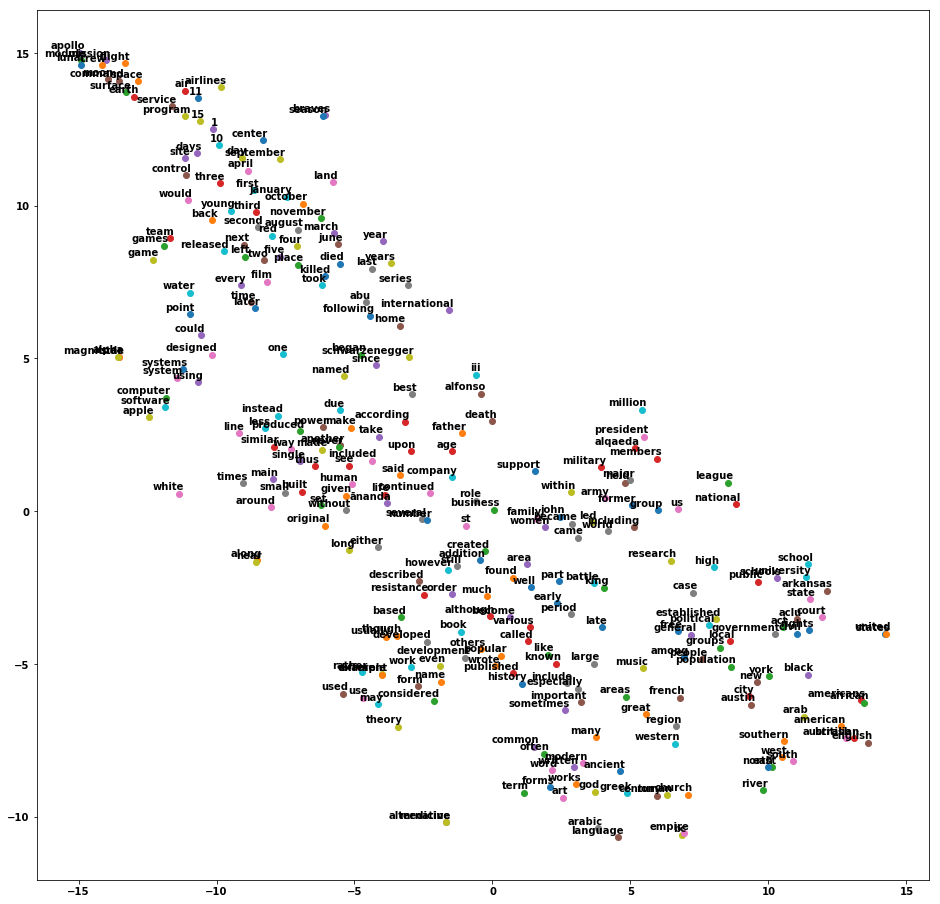

In [52]:
tsne_plot(model)

C:\hyapp\Anaconda_3_5_0_1\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


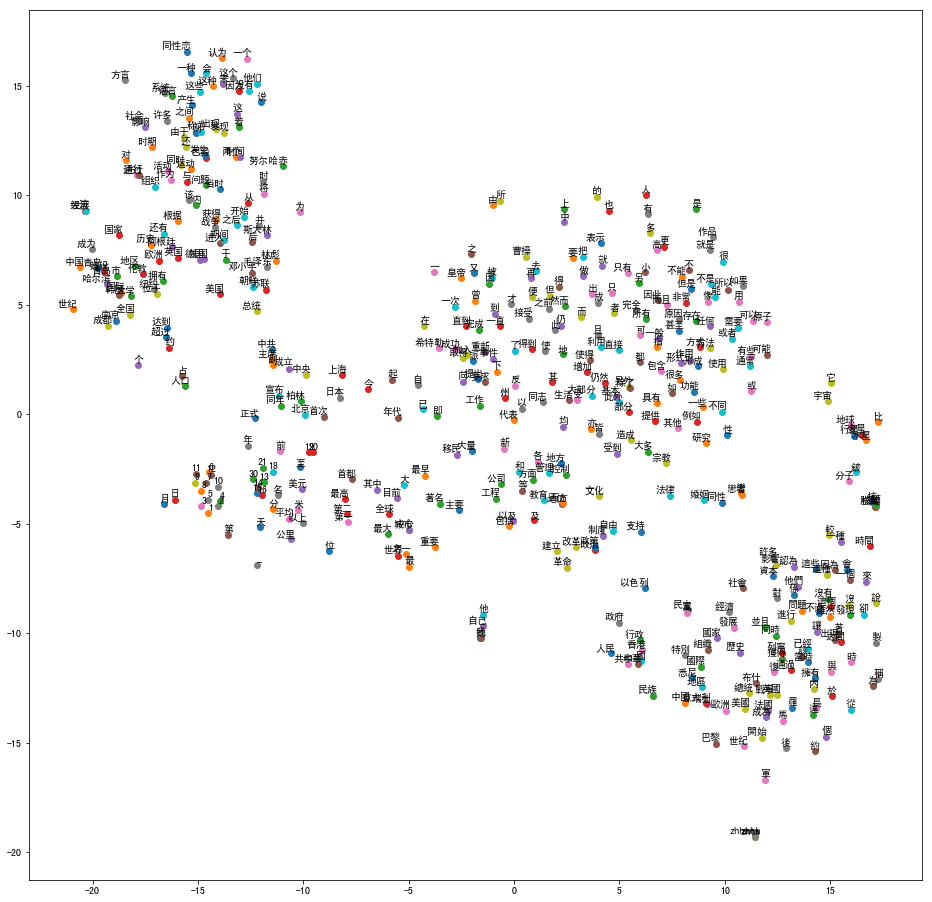

In [55]:
tsne_plot(model_zh)